In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set_style('darkgrid') #my default is "whitegrid"

In [2]:
#load csv file data with headers

location = "datasets/diamonds.csv"
df = pd.read_csv(location)

In [3]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [4]:
df.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

# Descriptive Analysis

In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#look for missing data
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
#look for duplicate data
dupe = df.duplicated()
df.loc[dupe]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


# Making Bins

In [8]:
#Define bins 
bins = [0, 5000, 10000, 15000, 20000]

#Create names for the groups
group_names = ['Cheap', 'Low', 'Mid', 'Expensive']

#make new column with diamond price grades
df['price grade'] = pd.cut(df['price'], bins, labels=group_names)

In [9]:
pd.value_counts(df['price grade']) # number of observations per price grade

Cheap        39226
Low           9492
Mid           3567
Expensive     1655
Name: price grade, dtype: int64

# Removing Outliers

In [10]:
#Standard Deviation Method

meangrade = df['price'].mean()
stdgrade = df['price'].std()
toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96

copydf = df #because we don't want to mess up the original df
copydf = copydf.drop(copydf[copydf['price'] > toprange].index)
copydf = copydf.drop(copydf[copydf['price'] < botrange].index)

copydf.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price grade
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Cheap
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Cheap
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Cheap
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Cheap
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Cheap


# Adding and Dropping Columns

In [11]:
#calculate dimensions based on x, y, z
def find_dimensions(x, y, z):
    return x*y*z
    
df['dimension'] = find_dimensions(df['x'], df['y'], df['z'])

In [12]:
#drop column
df = df.drop('Unnamed: 0', axis = 1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,price grade,dimension
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Cheap,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Cheap,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Cheap,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Cheap,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Cheap,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Cheap,38.693952
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Cheap,38.830870
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Cheap,42.321081
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Cheap,36.425214
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Cheap,38.718000


# Random Diamond

In [13]:
#find a random diamond
from numpy import random
#random.seed(500)

randomIndex = random.randint(low=0,high=len(df)) 
print(randomIndex)
df.loc[randomIndex]

52531


carat             0.72
cut              Ideal
color                I
clarity           VVS2
depth             61.7
table               55
price             2530
x                 5.71
y                 5.76
z                 3.54
price grade      Cheap
dimension      116.429
Name: 52531, dtype: object

Text(0.5,1,'Price vs Carat by Color')

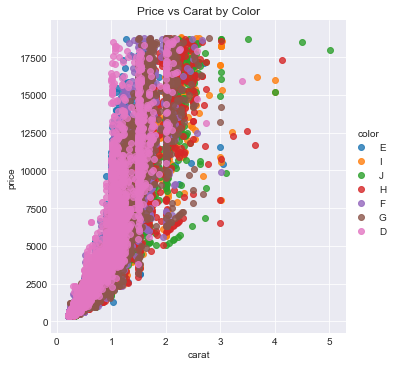

In [14]:
sns.lmplot(x='carat', y='price', data=df, fit_reg=False, hue = 'color')
plt.title('Price vs Carat by Color')

In [15]:
df.corr()

,carat,depth,table,price,x,y,z,dimension
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065
dimension,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,1.000000


In [16]:
result1 = smf.ols('price ~ carat + depth + table + x + y + z', data=df).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:59:14   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
result2 = smf.ols(formula='price ~ carat + depth + table + x + y + z - 1', data=df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.120e+05
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:59:14   Log-Likelihood:            -4.7196e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53934   BIC:                         9.440e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9533.9516     59.317    160.730      0.000    9417.691    9650.213
depth         28.2911      2.416     11.712      0.000      23.556      33.026
table        -18.8220      2.558     -7.358      0.000     -23.836     -13.808
x           -522.6300     40.351    -12.952      0.000    -601.718    -443.542
y            182.3295     25.907      7.038      0.000     131.552     233.107
z           -676.7502     42.361    -15.976      0.000    -759.778    -593.722
==============================================================================
Omnibus:                    14555.339   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287131.956
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      14.186   Cond. No.                         829.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analysis On Diamonds of Best Cut and Clarity

In [18]:
cf = df.loc[(df['cut'] == 'Ideal') & ((df['clarity'] == 'FL') | (df['clarity'] == 'IF'))] #find diamonds of best cut and clarity

In [19]:
cf

,carat,cut,color,clarity,depth,table,price,x,y,z,price grade,dimension
229,0.52,Ideal,F,IF,62.2,55.0,2783,5.14,5.18,3.21,Cheap,85.466892
250,0.55,Ideal,G,IF,60.9,57.0,2789,5.28,5.30,3.22,Cheap,90.108480
256,0.64,Ideal,G,IF,61.3,56.0,2790,5.54,5.58,3.41,Cheap,105.414012
313,0.61,Ideal,G,IF,62.3,56.0,2800,5.43,5.45,3.39,Cheap,100.321965
326,0.53,Ideal,F,IF,61.9,54.0,2802,5.22,5.25,3.24,Cheap,88.792200
841,0.62,Ideal,G,IF,60.5,57.0,2868,5.52,5.56,3.35,Cheap,102.815520
846,0.62,Ideal,G,IF,61.8,56.0,2869,5.43,5.47,3.37,Cheap,100.096077
1161,0.71,Ideal,I,IF,61.5,56.0,2925,5.74,5.77,3.54,Cheap,117.244092
1293,0.74,Ideal,I,IF,62.1,53.9,2952,5.79,5.81,3.60,Cheap,121.103640
1331,0.64,Ideal,G,IF,61.7,58.0,2960,5.52,5.56,3.42,Cheap,104.963904


Text(0.5,1,'Price vs Carat by Color for Best Cut and Clarity')

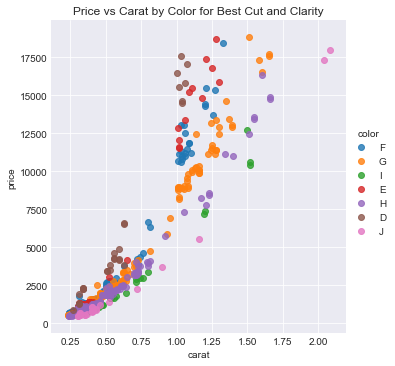

In [20]:
sns.lmplot(x='carat', y='price', data=cf, fit_reg=False, hue = 'color')
plt.title('Price vs Carat by Color for Best Cut and Clarity')

Text(0.5,1,'Price vs Color for Best Cut and Clarity')

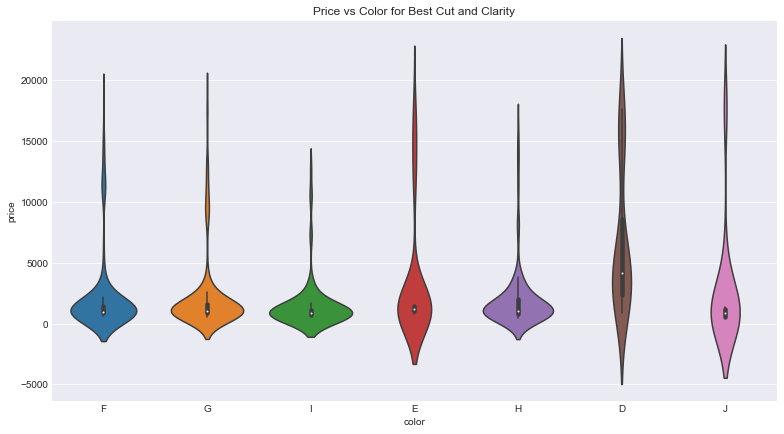

In [21]:
plt.subplots(figsize=(13,7))
sns.violinplot(x='color', y='price', data=cf)
plt.title('Price vs Color for Best Cut and Clarity')

# Analysis On 300 Most Expensive Diamonds

In [22]:
df = df.sort_values('price')
ef = df.iloc[-300:] #find most expensive 300 diamonds
ef

,carat,cut,color,clarity,depth,table,price,x,y,z,price grade,dimension
27420,2.32,Fair,H,SI1,62.0,62.0,18026,8.47,8.31,5.20,Expensive,366.005640
27421,2.32,Premium,I,SI1,61.2,58.0,18026,8.57,8.52,5.23,Expensive,381.875772
27422,2.01,Very Good,H,SI1,58.2,63.0,18027,8.32,8.23,4.82,Expensive,330.042752
27423,2.01,Good,E,SI1,58.7,59.0,18027,8.23,8.27,4.84,Expensive,329.420564
27424,2.26,Very Good,D,SI2,61.6,61.0,18028,8.47,8.38,5.19,Expensive,368.378934
27425,2.51,Very Good,H,SI2,63.6,58.0,18029,8.51,8.59,5.44,Expensive,397.668896
27426,2.16,Ideal,I,SI1,62.0,56.0,18029,8.28,8.30,5.14,Expensive,353.241360
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00,Expensive,0.000000
27427,2.11,Premium,E,SI2,62.4,61.0,18034,8.19,8.10,5.08,Expensive,337.002120
27428,2.25,Premium,I,SI1,60.1,60.0,18034,8.55,8.51,5.13,Expensive,373.261365


In [23]:
resultexp = smf.ols(formula='price ~ carat + depth + table + x + y + z', data=ef).fit()
resultexp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4273
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.861
Time:                        15:59:16   Log-Likelihood:                -2056.0
No. Observations:                 300   AIC:                             4126.
Df Residuals:                     293   BIC:                             4152.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.802e+04    899.305     20.038      0.000    1.63e+04    1.98e+04
carat        -31.3427     52.081     -0.602      0.548    -133.843      71.157
depth          4.2219     10.066      0.419      0.675     -15.589      24.033
table         -1.8796      6.929     -0.271      0.786     -15.516      11.756
x             87.9120    174.731      0.503      0.615    -255.974     431.798
y            -39.4414    176.272     -0.224      0.823    -386.360     307.478
z            -21.5889     31.121     -0.694      0.488     -82.838      39.661
==============================================================================
Omnibus:                      114.019   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.524
Skew:                           0.162   Prob(JB):                     0.000157
Kurtosis:                       1.861   Cond. No.                     5.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
resultexp = smf.ols(formula='price ~ carat + depth + table + x + y + z - 1', data=ef).fit()
resultexp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.331e+05
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:59:16   Log-Likelihood:                -2185.5
No. Observations:                 300   AIC:                             4383.
Df Residuals:                     294   BIC:                             4405.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       -375.8766     75.558     -4.975      0.000    -524.580    -227.173
depth        185.3165      6.813     27.202      0.000     171.909     198.724
table         98.2480      7.377     13.319      0.000      83.730     112.766
x           -881.9940    258.045     -3.418      0.001   -1389.844    -374.144
y           1219.1221    253.141      4.816      0.000     720.924    1717.320
z           -132.6014     47.068     -2.817      0.005    -225.235     -39.968
==============================================================================
Omnibus:                        1.806   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.656
Skew:                          -0.027   Prob(JB):                        0.437
Kurtosis:                       3.360   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#resultexp = smf.ols(formula='price ~ carat + depth + table - 1', data=ef).fit()
#resultexp.summary()

Text(0.5,1,'Price vs Carat by Cut for Most Expensive Diamonds')

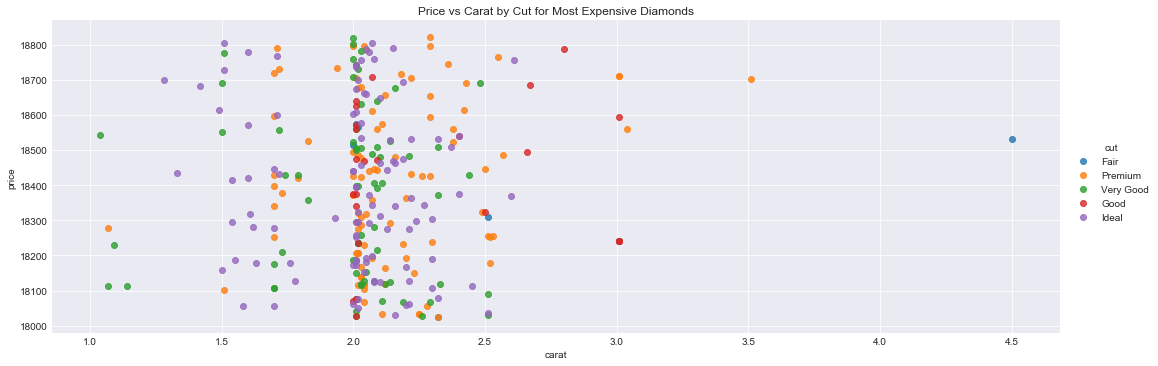

In [26]:
#plt.subplots(figsize=(13,7))
sns.lmplot(x='carat', y='price', data=ef, fit_reg=False, hue = 'cut', aspect = 3)
plt.title('Price vs Carat by Cut for Most Expensive Diamonds')

Text(0.5,1,'Price vs Carat by Color for Most Expensive Diamonds')

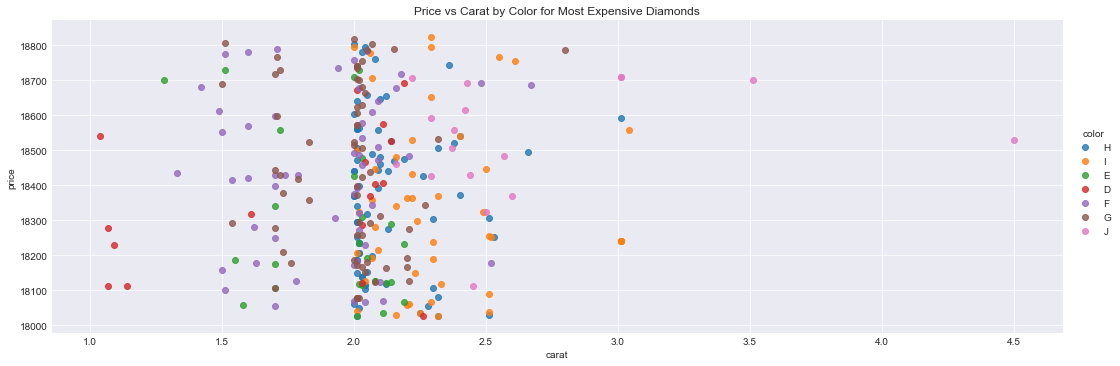

In [27]:
sns.lmplot(x='carat', y='price', data=ef, fit_reg=False, hue = 'color', aspect = 3)
plt.title('Price vs Carat by Color for Most Expensive Diamonds')

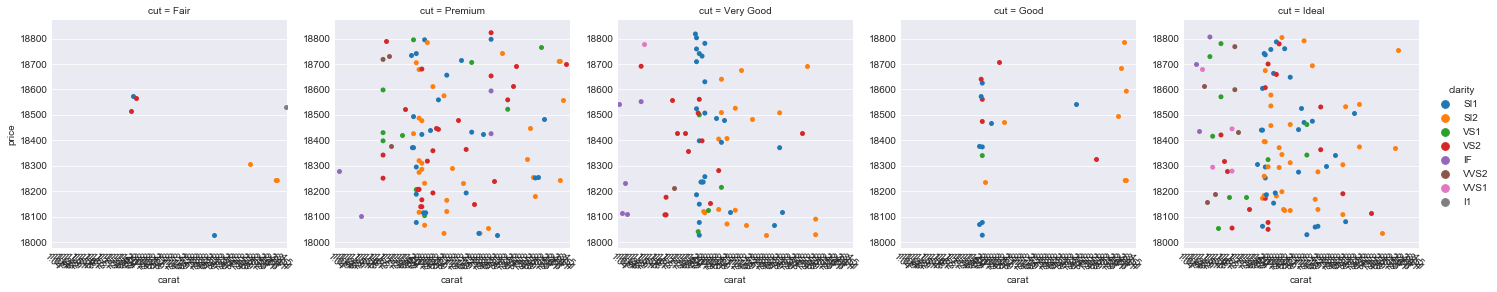

In [28]:
#scatterplot by each color
g = sns.factorplot(x='carat', y='price',
                   data=ef,
                   hue='clarity', 
                   col='cut',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

# Analysis On 300 Cheapest Diamonds

In [29]:
chf = df.iloc[0:300] #find cheapest 300 diamonds
chf

,carat,cut,color,clarity,depth,table,price,x,y,z,price grade,dimension
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Cheap,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Cheap,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Cheap,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Cheap,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Cheap,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Cheap,38.693952
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Cheap,38.830870
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Cheap,42.321081
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Cheap,36.425214
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Cheap,38.718000


In [30]:
resultchp = smf.ols(formula='price ~ carat + depth + table + x + y + z', data=chf).fit()
resultchp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4.611
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           0.000171
Time:                        15:59:33   Log-Likelihood:                -1283.7
No. Observations:                 300   AIC:                             2581.
Df Residuals:                     293   BIC:                             2607.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    341.7547    833.874      0.410      0.682   -1299.387    1982.897
carat       -590.7922    246.745     -2.394      0.017   -1076.409    -105.176
depth         -5.9588     13.434     -0.444      0.658     -32.399      20.481
table          0.6104      0.538      1.134      0.258      -0.449       1.670
x            -81.4432    114.851     -0.709      0.479    -307.481     144.595
y             72.3671    102.585      0.705      0.481    -129.531     274.265
z            221.4973    329.537      0.672      0.502    -427.063     870.057
==============================================================================
Omnibus:                       28.387   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.953
Skew:                          -0.817   Prob(JB):                     4.24e-08
Kurtosis:                       3.218   Cond. No.                     7.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
resultchp = smf.ols(formula='price ~ carat + depth + table + x + y + z - 1', data=chf).fit()
resultchp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.340e+04
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:59:33   Log-Likelihood:                -1283.8
No. Observations:                 300   AIC:                             2580.
Df Residuals:                     294   BIC:                             2602.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       -601.5014    245.010     -2.455      0.015   -1083.697    -119.306
depth         -0.5435      2.424     -0.224      0.823      -5.313       4.226
table          0.6263      0.536      1.168      0.244      -0.429       1.681
x            -37.6633     42.129     -0.894      0.372    -120.576      45.250
y            110.3546     43.899      2.514      0.012      23.959     196.750
z             92.7493     99.405      0.933      0.352    -102.886     288.384
==============================================================================
Omnibus:                       28.597   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.263
Skew:                          -0.821   Prob(JB):                     3.63e-08
Kurtosis:                       3.219   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
resultchp = smf.ols(formula='price ~ carat - 1', data=chf).fit()
resultchp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.587e+04
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          3.80e-261
Time:                        15:59:33   Log-Likelihood:                -1610.9
No. Observations:                 300   AIC:                             3224.
Df Residuals:                     299   BIC:                             3227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       1383.9739     10.986    125.979      0.000    1362.355    1405.593
==============================================================================
Omnibus:                      114.713   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.721
Skew:                           0.173   Prob(JB):                     0.000142
Kurtosis:                       1.861   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Price vs Carat by Cut for Cheapest Diamonds')

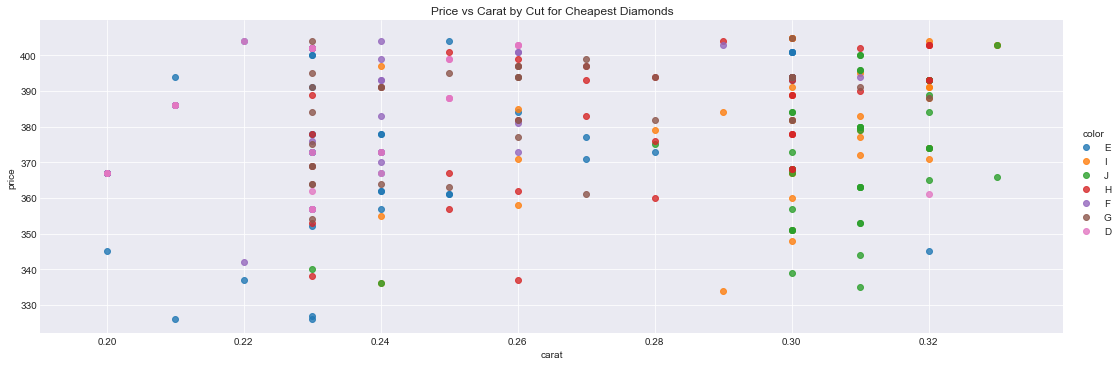

In [33]:
sns.lmplot(x='carat', y='price', data=chf, fit_reg=False, hue = 'color', aspect = 3)
plt.title('Price vs Carat by Cut for Cheapest Diamonds')

Text(0.5,1,'Price vs Carat by Color for Cheapest Diamonds')

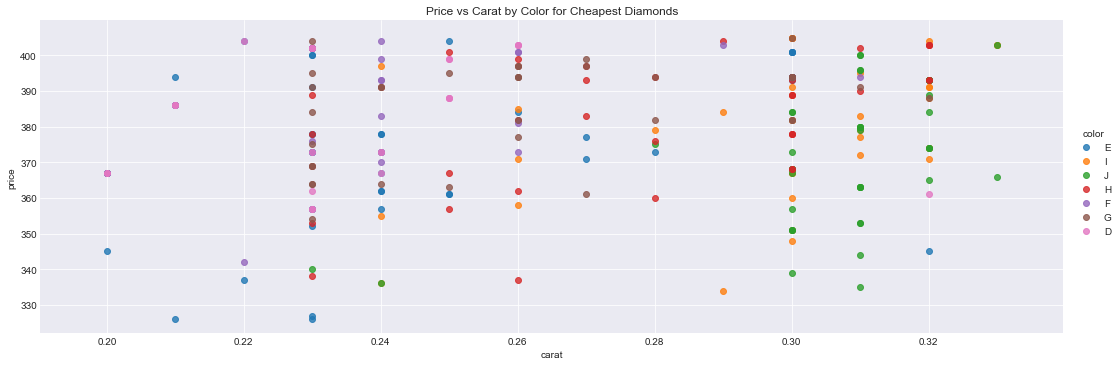

In [34]:
sns.lmplot(x='carat', y='price', data=chf, fit_reg=False, hue = 'color', aspect  = 3)
plt.title('Price vs Carat by Color for Cheapest Diamonds')

# All Diamonds

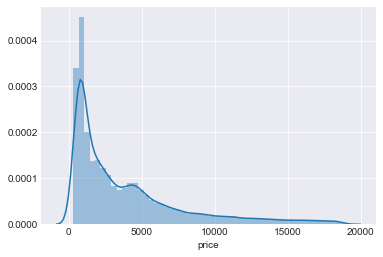

In [35]:
sns.distplot(df['price']) #distribution of price for all diamonds

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

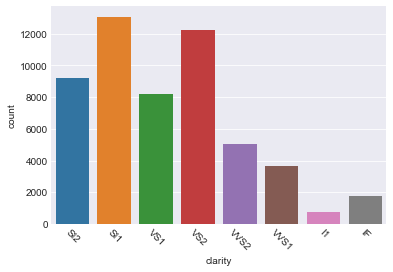

In [36]:
#create a bar plot of Clarity frequency
sns.countplot(x='clarity',
              data=df)

plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

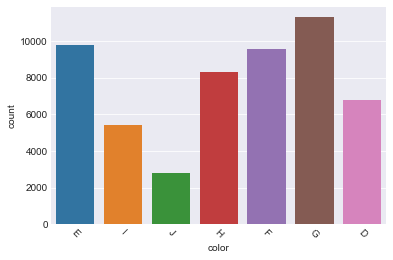

In [37]:
#create a bar plot of Color frequency
sns.countplot(x='color',
              data=df)

plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

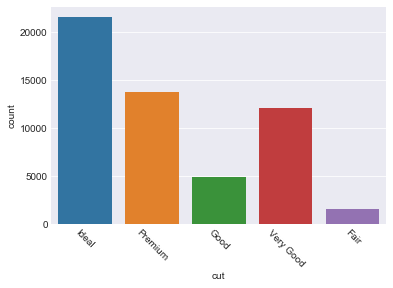

In [38]:
#create a bar plot of Cut frequency
sns.countplot(x='cut',
              data=df)

plt.xticks(rotation=-45)

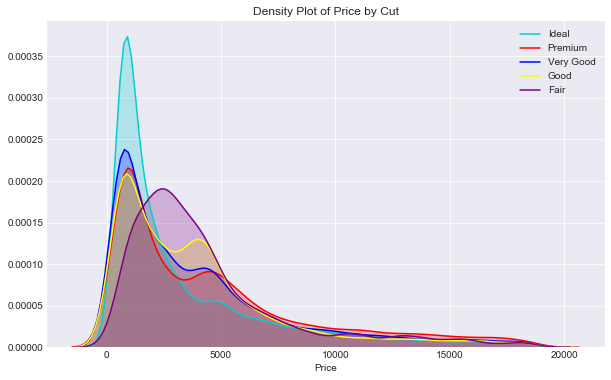

In [39]:
#plot price by cut
plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['price'][df['cut'] == 'Ideal'], 
                 color="darkturquoise",
                 shade=True)

sns.kdeplot(df['price'][df['cut'] == 'Premium'], 
            color="red",
            shade=True)

sns.kdeplot(df['price'][df['cut'] == 'Very Good'], 
            color="blue",
            shade=True)

sns.kdeplot(df['price'][df['cut'] == 'Good'], 
            color="yellow",
            shade=True)

sns.kdeplot(df['price'][df['cut'] == 'Fair'], 
            color="purple",
            shade=True)

plt.legend (['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
plt.title("Density Plot of Price by Cut")

ax.set(xlabel='Price')
plt.show()

# Linear Regression

In [41]:
modeldf = df.drop(['price grade'], axis=1)


modeldf.columns

#dummy variables for cut, color, clarity
#get_dummies will auto-drop columns that dummies were created from
modeldf = pd.get_dummies(data=modeldf, columns=['cut','color','clarity'])
modeldf.head()


,carat,depth,table,price,x,y,z,dimension,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,0,1,...,0,1,0,0,0,1,0,0,0,0


In [42]:
from sklearn.linear_model import LinearRegression
X = modeldf.drop('price', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()

In [43]:
lm.fit(X, modeldf.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 4163.27983808


In [45]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 27


In [46]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,carat,9590.494449
1,depth,-36.461711
2,table,-21.871367
3,x,-242.076935
4,y,-628.497836
5,z,-410.099466
6,dimension,11.605296
7,cut_Fair,-592.740340
8,cut_Good,15.537833
9,cut_Ideal,254.996766


In [47]:
lm.predict(X)[0:5]

array([-1325.44712921,  -610.65004288,   229.05367179,  -843.82325376,
       -3393.00246047])

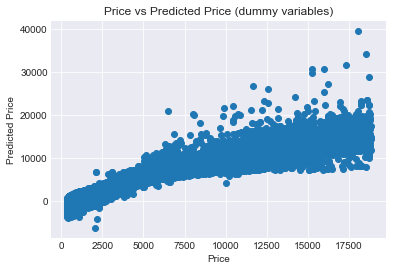

In [48]:
plt.scatter(df.price, lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price (dummy variables)")
plt.show()

In [49]:
mseFull = np.mean((df.price - lm.predict(X)) ** 2)
print(mseFull)

1269995.364769487


In [50]:
#model2df = df.drop(['Unnamed: 0'], axis=1)

#model2df['cut'] = model2df['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
#model2df.head()

#model2df['color'] = model2df['color'].map({'J':0, 'I':1, 'H':2,'G':3,'F':4, 'E':5, 'D':6})
#model2df.head()

#model2df['clarity'] = model2df['clarity'].map({'I3':0, 'I2':1, 'I1':2, 'SI2':3, 'SI1':4, 'VS2':5, 'VS1':6, 'VVS2':7, 'VVS1':8, 'IF':9, 'FL':10})
#model2df.head()

In [51]:
#X2 = model2df.drop('price', axis = 1)

#lm.fit(X2, model2df.price)

In [52]:
#plt.scatter(df.price, lm.predict(X2))
#plt.xlabel("Price")
#plt.ylabel("Predicted Price")
#plt.title("Price vs Predicted Price")
#plt.show()

In [53]:
#test_size default = 0.25
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df.price, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36139, 27)
(17801, 27)
(36139,)
(17801,)


In [54]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [55]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1257304.5049670376
Fit a model X_train, and calculate MSE with X_test, Y_test: 1301063.107493552


# Logistic Regression

In [56]:
#Logistic Regression

#80% for training data, 20% for test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X, df.cut, test_size=0.2, random_state=15)

In [57]:
#build logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
#accuracy score of model using training data
LogReg.score(X2_train, y2_train)

1.0

In [59]:
#accuracy score of model on test data
LogReg.score(X2_test, y2_test)

0.99990730441231002

# Decision Tree

In [60]:
#80% for training data, 20% for test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X, df.cut, test_size=0.2, random_state=90)

In [61]:
#assign decision tree function to model variable
model = tree.DecisionTreeClassifier()

In [62]:
#develop model using training data
#defining arguments in the model can help prevent overfitting
model.fit(X3_train, y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
#run the predictions on the test data
y3_predict = model.predict(X3_test)

In [64]:
#check the accuracy of model
accuracy_score(y3_test, y3_predict)

1.0